In [11]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [12]:
#https://proglib.io/p/unsupervised-ml-with-python/

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

# Создаем датафрейм
seeds_df = pd.read_csv(
"http://qps.ru/jNZUT")
kmeans = KMeans(n_clusters = 4)
# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
varieties = list(seeds_df.pop('grain_variety'))
varieties = ['1','2','3','4']
# Извлекаем измерения как массив NumPy
from sklearn.datasets.samples_generator import make_blobs

samples, y_true = make_blobs(n_samples = 500, centers = 4, cluster_std = 10, random_state = 10)

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')


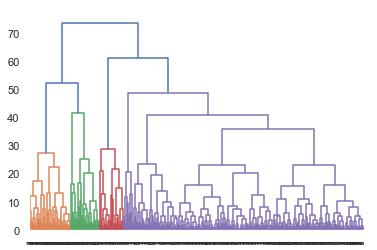

In [37]:
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=y_true,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

In [30]:
scores = []
values = np.arange(2, 10)

In [41]:
X1, y_true = make_blobs(n_samples = 500, centers = 4,
            cluster_std = 10, random_state = 10)
for num_clusters in values:
    kmeans = KMeans(init = 'k-means++', n_clusters = num_clusters, n_init = 10)
    kmeans.fit(samples)
    
from sklearn import metrics 
model_predictions = kmeans.predict(X1)
print(metrics.accuracy_score(kmeans.labels_, model_predictions))
print(metrics.classification_report(kmeans.labels_, model_predictions))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        62
           5       1.00      1.00      1.00        93
           6       1.00      1.00      1.00        75
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00        28

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [32]:
score = metrics.silhouette_score(X1, kmeans.labels_,metric = 'manhattan', sample_size = len(X1))

In [42]:
print("Silhouette score =", score)
scores.append(score)

Silhouette score = 0.3286072981137491


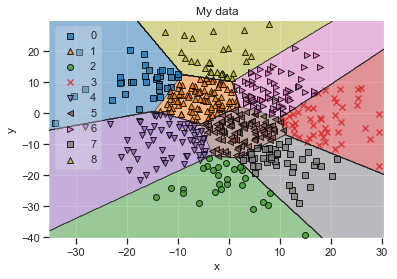

In [43]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X1, kmeans.labels_, clf=kmeans, legend=2)

# Adding axes annotations
plt.xlabel('x')
plt.ylabel('y')
plt.title('My data')
plt.show()